In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib import animation

plt.style.use('seaborn')

## Wave Equation:
<font size="5">$
\begin{cases}
 & \frac{\partial^2 w}{\partial t^2} = c^{2} \frac{\partial^2 w}{\partial x} \\
 & w(t,0) = \alpha(t)\\ 
 & w(t,l) = \beta(t) \\ 
 & w(0,x) = f(x) \\ 
 & \frac{\partial w}{\partial t}(0,x) = g(x)
\end{cases}$
    

### Finite Difference:  
<font size="5">$\frac{\mathrm{d} y(x)}{\mathrm{d} x} = \frac{y(x_{i+1})-y(x_{i-1})}{2\Delta x}$  
    
<font size="5">$\frac{\mathrm{d}^2 y(x)}{\mathrm{d} x^2} = \frac{y(x_{i+1})-2y(x_{i})+y(x_{i-1})}{(\Delta x)^2}$

### Discretize equation:
<font size="5">$w(t_{i},x_{j}) = w_{j}^{i}$  
  
<font size="5">$\frac{\partial^2 w}{\partial t^2}(t_{i},x_{j}) = \frac{w_{j}^{i+1} - 2w_{j}^{i} + w_{j}^{i-1}}{(\Delta t)^2}$  
<font size="5">$\frac{\partial^2 w}{\partial x^2}(t_{i},x_{j}) = \frac{w_{j+1}^{i} - 2w_{j}^{i} + w_{j-1}^{i}}{(\Delta x)^2}$
  
->
  
<font size="5">$\frac{w_{j}^{i+1} - 2w_{j}^{i} + w_{j}^{i-1}}{(\Delta t)^2} = c^2 \frac{w_{j+1}^{i} - 2w_{j}^{i} + w_{j-1}^{i}}{(\Delta x)^2}$
  
->
  
<font size="5">$w_{j}^{i+1} = (\Delta t)^2c^2 \frac{w_{j+1}^{i} -2w_{j}^{i} +w_{j-1}^{i}}{(\Delta x)^2} + 2w_{j}^i - w_{j}^{i-1}$  
  
->
   
<font size="5">$w_{j}^{i+1} = \sigma^2 (w_{j+1}^{i} -2w_{j}^{i} +w_{j-1}^{i}) + 2w_{j}^i - w_{j}^{i-1}$  
<font size="5">$\left ( \sigma = \frac{c\Delta t}{\Delta x} \right )$

### Initial condition is a cosine function

In [37]:
L = 1     # length
T = 4     # time
c = 0.94
dx = 0.01
dt = 0.01
sigma2 = (c*dt/dx) ** 2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)
Nx = x.size
Nt = t.size

w = np.zeros((Nt, Nx))
w[:,0] = 0
w[:,-1] = 0
w[0,:] = 0.5 * (np.cos(2*np.pi*x) - 1)
w[1,:] = w[0,:]

for itime in range(2, Nt):
    for ix in range(1, Nx-1):
        w[itime,ix] = 2*w[itime-1,ix] - w[itime-2,ix] + sigma2 * (w[itime-1,ix+1] - 2*w[itime-1,ix] + w[itime-1,ix-1])

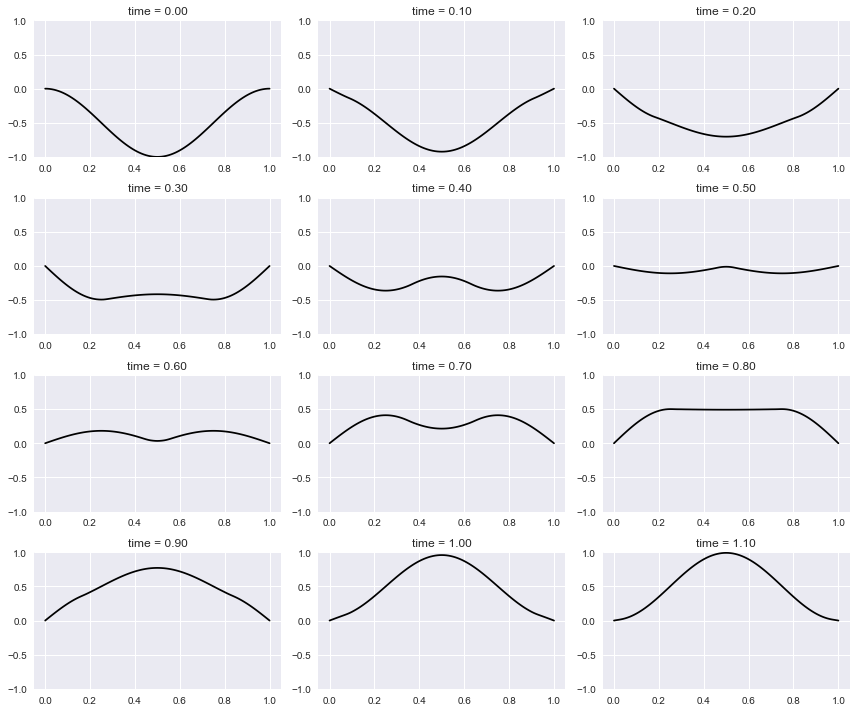

In [38]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

idx = 0
for i in range(4):
    for j in range(3):
        axs[i,j].plot(x, w[idx,:], 'k')
        axs[i,j].set_title('time = {:.2f}'.format(t[idx]))
        axs[i,j].set_ylim([-1, 1])
        idx += 10
        
plt.tight_layout()

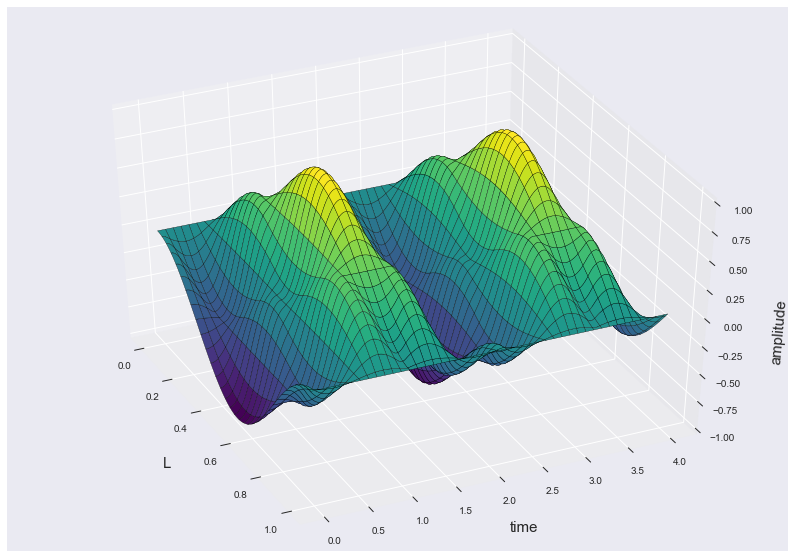

In [3]:
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, w, cmap='viridis', edgecolor='k')
ax.set_xlabel('L', labelpad=20, fontsize=15)
ax.set_ylabel('time', labelpad=20, fontsize=15)
ax.set_zlabel('amplitude', labelpad=20, fontsize=15)
ax.view_init(40, -25)

In [4]:
# store as a gif
fig = plt.figure()
plts = []  
for itime in range(Nt):
    p, = plt.plot(x, w[itime,:], 'k')
    text = plt.text(0.5, 1.05, 'time = {:.2f}'.format(t[itime]),
                    ha='center', fontsize=15,
                    transform=plt.gca().transAxes)   # use plt.text instead of plt.title. title can not work well
    plts.append([p, text])

ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)
ani.save('cosine.gif')
plt.close()

MovieWriter ffmpeg unavailable.


### Initial condition is a impulse function

In [39]:
def init_fn(x, mu, sigma):
    return np.exp(-(x-mu)**2 / (2*sigma**2)) / (np.sqrt(2*np.pi) * sigma)


L = 1     # length
T = 4     # time
c = 0.94
dx = 0.01
dt = 0.01
sigma2 = (c*dt/dx) ** 2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)
Nx = x.size
Nt = t.size

w = np.zeros((Nt, Nx))
w[:,0] = 0
w[:,-1] = 0
w[0,:] = init_fn(x, x.mean(), 0.05)
w[1,:] = w[0,:]

for itime in range(2, Nt):
    for ix in range(1, Nx-1):
        w[itime,ix] = 2*w[itime-1,ix] - w[itime-2,ix] + sigma2 * (w[itime-1,ix+1] - 2*w[itime-1,ix] + w[itime-1,ix-1])

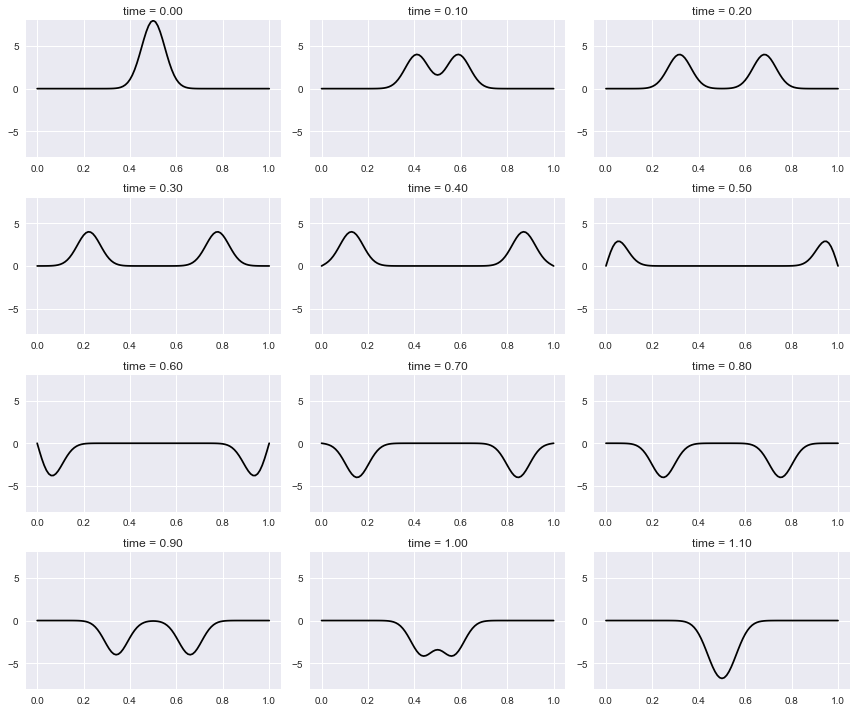

In [42]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

idx = 0
for i in range(4):
    for j in range(3):
        axs[i,j].plot(x, w[idx,:], 'k')
        axs[i,j].set_title('time = {:.2f}'.format(t[idx]))
        axs[i,j].set_ylim([-8, 8])
        idx += 10
        
plt.tight_layout()

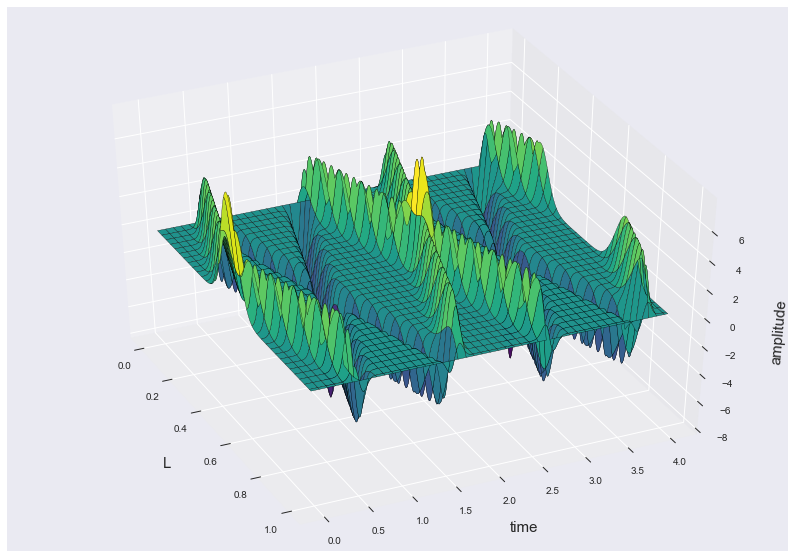

In [43]:
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, w, cmap='viridis', edgecolor='k')
ax.set_xlabel('L', labelpad=20, fontsize=15)
ax.set_ylabel('time', labelpad=20, fontsize=15)
ax.set_zlabel('amplitude', labelpad=20, fontsize=15)
ax.view_init(40, -25)

In [44]:
# store as a gif
fig = plt.figure()
plts = []  
for itime in range(Nt):
    p, = plt.plot(x, w[itime,:], 'k')
    text = plt.text(0.5, 1.05, 'time = {:.2f}'.format(t[itime]),
                    ha='center', fontsize=15,
                    transform=plt.gca().transAxes)   # use plt.text instead of plt.title. title can not work well
    plts.append([p, text])

ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)
ani.save('impulse.gif')
plt.close()

MovieWriter ffmpeg unavailable.


### Initial condition is a consine function with right-side boundary free

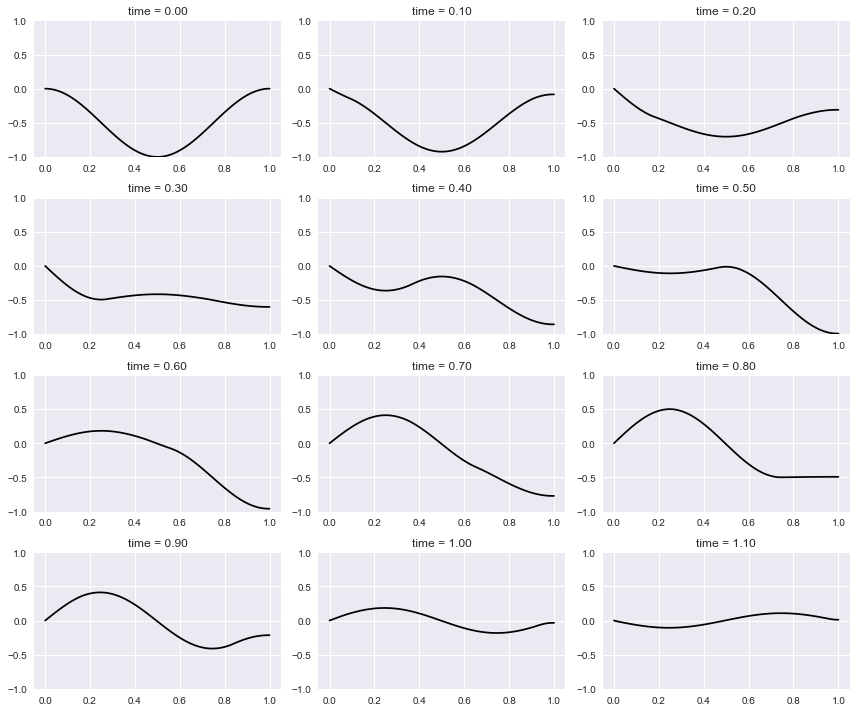

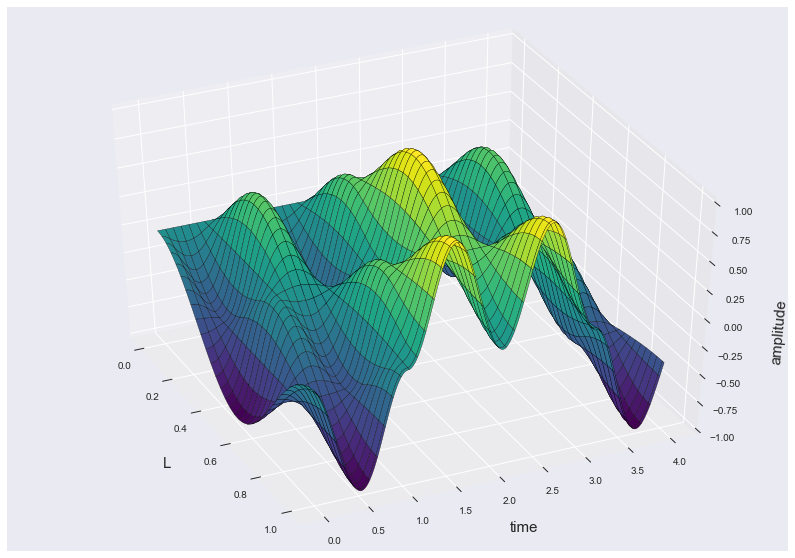

In [46]:
L = 1     # length
T = 4     # time
c = 0.94
dx = 0.01
dt = 0.01
sigma2 = (c*dt/dx) ** 2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)
Nx = x.size
Nt = t.size

w = np.zeros((Nt, Nx))
w[:,0] = 0
w[:,-1] = 0
w[0,:] = 0.5 * (np.cos(2*np.pi*x) - 1)
w[1,:] = w[0,:]

for itime in range(2, Nt):
    for ix in range(1, Nx-1):
        w[itime,ix] = 2*w[itime-1,ix] - w[itime-2,ix] + sigma2 * (w[itime-1,ix+1] - 2*w[itime-1,ix] + w[itime-1,ix-1])
    # free boundary
    w[itime,-1] = w[itime,-2]
    

# subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
idx = 0
for i in range(4):
    for j in range(3):
        axs[i,j].plot(x, w[idx,:], 'k')
        axs[i,j].set_title('time = {:.2f}'.format(t[idx]))
        axs[i,j].set_ylim([-1, 1])
        idx += 10
        
plt.tight_layout()


# 3D plot
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, w, cmap='viridis', edgecolor='k')
ax.set_xlabel('L', labelpad=20, fontsize=15)
ax.set_ylabel('time', labelpad=20, fontsize=15)
ax.set_zlabel('amplitude', labelpad=20, fontsize=15)
ax.view_init(40, -25)

In [47]:
# store as a gif
fig = plt.figure()
plts = []  
for itime in range(Nt):
    p, = plt.plot(x, w[itime,:], 'k')
    text = plt.text(0.5, 1.05, 'time = {:.2f}'.format(t[itime]),
                    ha='center', fontsize=15,
                    transform=plt.gca().transAxes)   # use plt.text instead of plt.title. title can not work well
    plts.append([p, text])

ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)
ani.save('cosine_freeBoundary.gif')
plt.close()

MovieWriter ffmpeg unavailable.


### Initial condition is a impulse function with right-side boundary free

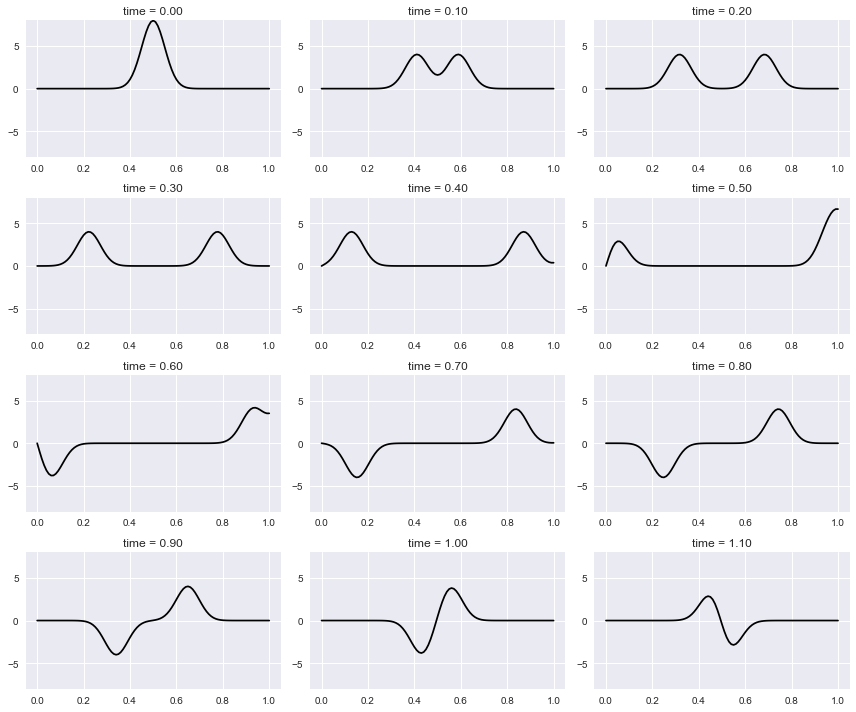

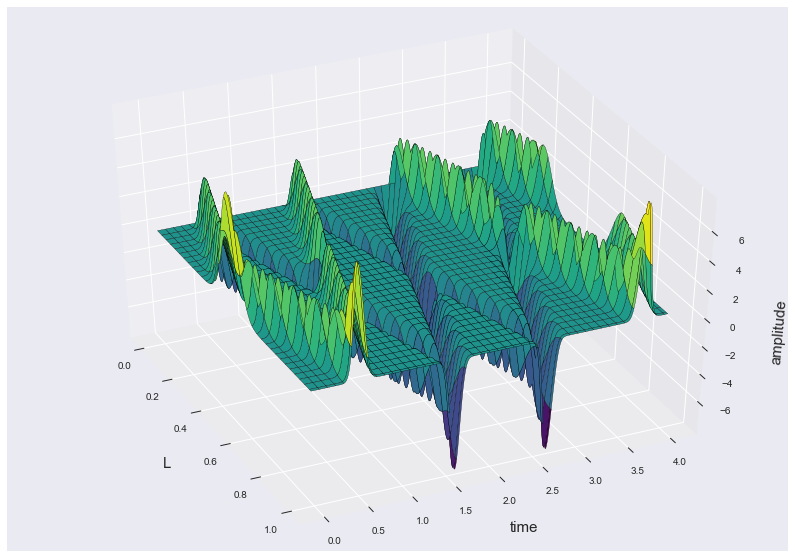

In [49]:
def init_fn(x, mu, sigma):
    return np.exp(-(x-mu)**2 / (2*sigma**2)) / (np.sqrt(2*np.pi) * sigma)


L = 1     # length
T = 4     # time
c = 0.94
dx = 0.01
dt = 0.01
sigma2 = (c*dt/dx) ** 2

x = np.arange(0, L+dx, dx)
t = np.arange(0, T+dt, dt)
Nx = x.size
Nt = t.size

w = np.zeros((Nt, Nx))
w[:,0] = 0
w[:,-1] = 0
w[0,:] = init_fn(x, x.mean(), 0.05)
w[1,:] = w[0,:]

for itime in range(2, Nt):
    for ix in range(1, Nx-1):
        w[itime,ix] = 2*w[itime-1,ix] - w[itime-2,ix] + sigma2 * (w[itime-1,ix+1] - 2*w[itime-1,ix] + w[itime-1,ix-1])
    # free boundary
    w[itime,-1] = w[itime,-2]
    

    # subplots
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))
idx = 0
for i in range(4):
    for j in range(3):
        axs[i,j].plot(x, w[idx,:], 'k')
        axs[i,j].set_title('time = {:.2f}'.format(t[idx]))
        axs[i,j].set_ylim([-8, 8])
        idx += 10
        
plt.tight_layout()


# 3D plot
X, T = np.meshgrid(x, t)

fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, w, cmap='viridis', edgecolor='k')
ax.set_xlabel('L', labelpad=20, fontsize=15)
ax.set_ylabel('time', labelpad=20, fontsize=15)
ax.set_zlabel('amplitude', labelpad=20, fontsize=15)
ax.view_init(40, -25)

In [50]:
# store as a gif
fig = plt.figure()
plts = []  
for itime in range(Nt):
    p, = plt.plot(x, w[itime,:], 'k')
    text = plt.text(0.5, 1.05, 'time = {:.2f}'.format(t[itime]),
                    ha='center', fontsize=15,
                    transform=plt.gca().transAxes)   # use plt.text instead of plt.title. title can not work well
    plts.append([p, text])

ani = animation.ArtistAnimation(fig, plts, interval=50, repeat_delay=3000)
ani.save('impulse_freeBoundary.gif')
plt.close()

MovieWriter ffmpeg unavailable.


### Stability condition

In [106]:
# set a function to calculate and plot
def calculate_plot(c):
    L = 1     # length
    T = 4     # time
    dx = 0.01
    dt = 0.01
    sigma2 = (c*dt/dx) ** 2

    x = np.arange(0, L+dx, dx)
    t = np.arange(0, T+dt, dt)
    Nx = x.size
    Nt = t.size

    w = np.zeros((Nt, Nx))
    w[:,0] = 0
    w[:,-1] = 0
    w[0,:] = 0.5 * (np.cos(2*np.pi*x) - 1)
    w[1,:] = w[0,:]

    for itime in range(2, Nt):
        for ix in range(1, Nx-1):
            w[itime,ix] = 2*w[itime-1,ix] - w[itime-2,ix] + sigma2 * (w[itime-1,ix+1] - 2*w[itime-1,ix] + w[itime-1,ix-1])

    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(12, 10))

    idx = 0
    for i in range(4):
        for j in range(3):
            axs[i,j].plot(x, w[idx,:], 'k')
            axs[i,j].set_title('time = {:.2f}'.format(t[idx]))
            axs[i,j].set_ylim([-1, 1])
            idx += 10
    
    if c < dx / dt:
        maintitle = 'Stable' + '\nC = {}'.format(c)
    else:
        maintitle = 'Unstable' + '\nC = {}'.format(c)
    plt.suptitle(maintitle, y=1.08, fontsize=20)
    plt.tight_layout()

#### stability condition: 
$c < \frac{dx}{dt}$

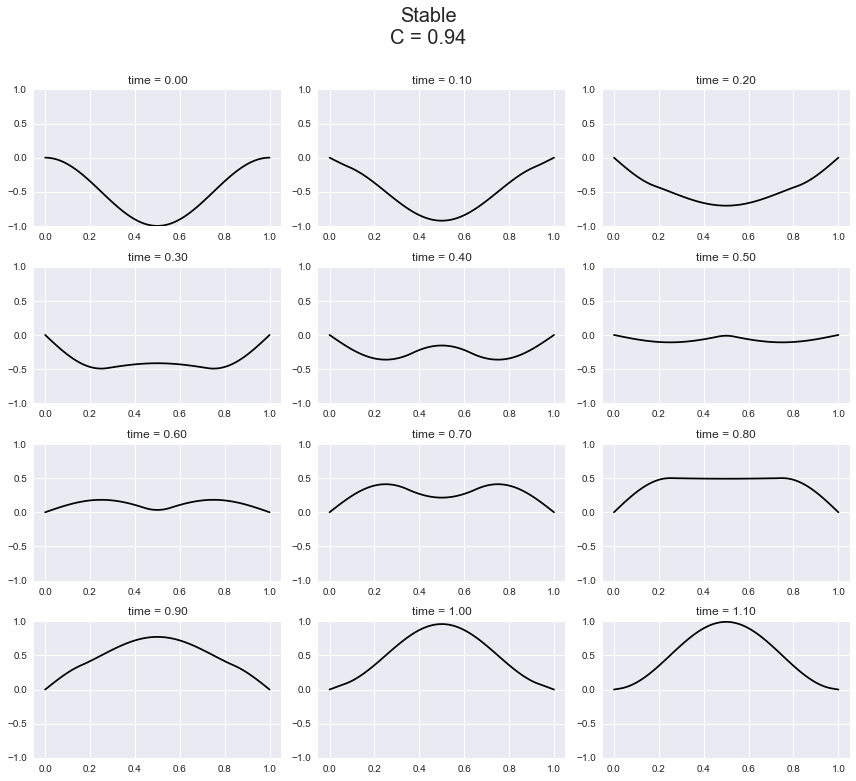

In [107]:
# stable case: 
# c = 0.94, dx = dt = 0.1
# c = 0.94 < 1  -> stable
calculate_plot(c=0.94)

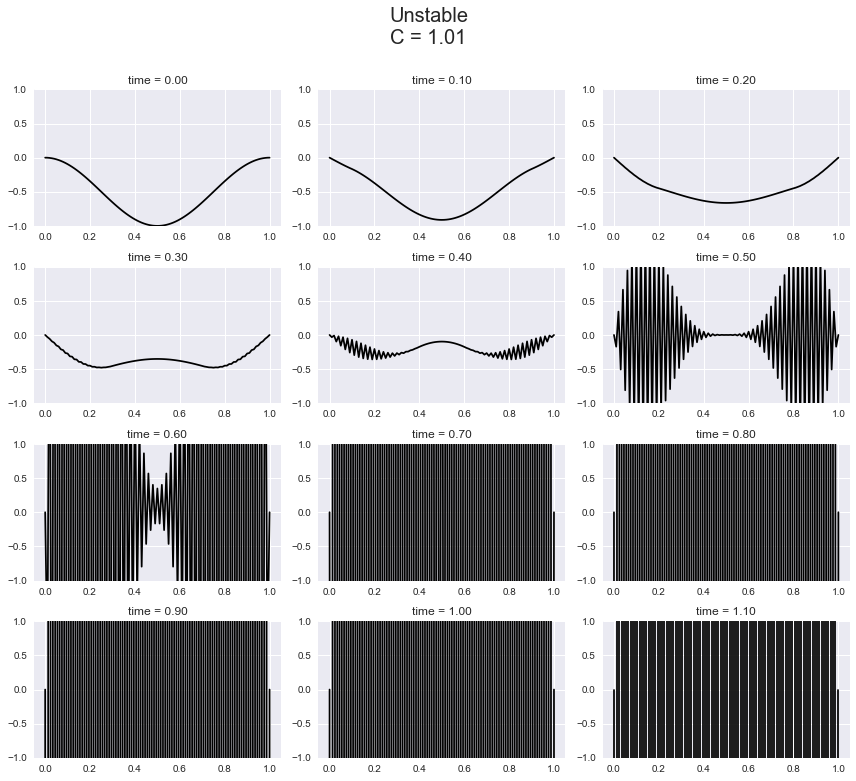

In [108]:
# unstable case: 
# c = 1.01, dx = dt = 0.1
# c = 1.01 > 1  -> unstable
calculate_plot(c=1.01)